# NumPy. Практика

## Как сдавать



1.   Создаем копию ноутбука и сохраняем к себе на Google Drive
2.   Выполняем задания
3.   Делаем ноутбук доступным для чтения и комментариев
     - в правом верхнем углу кликаем `Share`
     - выбираем Anyone with the link (в `General access`)
     - меняем роль `Viewer` на `Commenter`
     - копируем получившуюся ссылку (`Copy link`) и отправляем на степик


## Упражнения

### Задание 1

Замените столбец 0 и столбец 1 местами

In [1]:
import numpy as np

In [36]:
array = np.arange(9).reshape(3, 3)
print(f"Оригинальный \n{array}")
# Python way:
# array[:, 0],  array[:, 1] = array[:, 1],  array[:, 0].copy()

Оригинальный 
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [39]:
idx = [1, 0, 2]

In [40]:
array = array[:, idx]

In [41]:
print(f"Решение \n{array}")

Решение 
[[1 0 2]
 [4 3 5]
 [7 6 8]]


### Задание 2

Замените строку 0 и строку 1 местами

In [33]:
array = np.arange(9).reshape(3, 3)
print(f"Оригинальный \n{array}")
# Python way
# array[0, :],  array[1, :] = array[1, :],  array[0, :].copy()

Оригинальный 
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [34]:
array = array[idx]
array

array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])

In [35]:
print(f"Решение \n{array}")

Решение 
[[3 4 5]
 [0 1 2]
 [6 7 8]]


### Задание 3

Перепишите цикл перемножения матриц с использованием NumPy и сравните время выполнения

In [56]:
array1 = [*range(1, 10000001)]
array2 = [*range(10, 100000010, 10)]

# Выполняем умножение элементов массивов
def multiply_vectors(array_1, array_2):
    assert len(array_1) == len(array_2)
    return [array_1[i] * array_2[i] for i in range(len(array_1))]

In [57]:
%%time
result_python = multiply_vectors(array1, array2)

CPU times: user 572 ms, sys: 101 ms, total: 672 ms
Wall time: 674 ms


In [ ]:
# result_python

In [58]:
array1 = np.arange(1, 10000001)
array2 = np.arange(10, 100000010, 10)

In [59]:
%%time
result_np = array1*array2

CPU times: user 10 ms, sys: 6 ms, total: 16 ms
Wall time: 15.7 ms


In [60]:
# ваш код здесь
result_python == result_np

array([ True,  True,  True, ...,  True,  True,  True])

### Задание 4

Перепишите цикл нахождения факториала с использованием NumPy

Подсказка: понадобится `np.prod()`

In [61]:
def factorial(n):
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

In [62]:
%%time
n_values = [*range(1, 4000)]
for n in n_values:
    result = factorial(n)

CPU times: user 3.33 s, sys: 232 µs, total: 3.33 s
Wall time: 3.34 s


In [66]:
def factorial_numpy(n):
    # Создаем массив от 1 до n
    numbers = np.arange(1, n)

    # Вычисляем факториалы с использованием векторизации NumPy
    factorials = np.prod(n+1)

    return factorials

In [67]:
%%time
n_values = [*range(1, 4000)]
for n in n_values:
    result = factorial_numpy(n)

CPU times: user 26.3 ms, sys: 827 µs, total: 27.1 ms
Wall time: 28.6 ms


### Задание 5

Расчет общего сопротивления электрической цепи

Вам дан массив $R$ сопротивлений различных элементов электрической цепи, подключенных последовательно.

Ваша задача - вычислить общее сопротивление цепи с использованием функции einsum.

Формула расчета общего сопротивления

$1/R$ = $1/R_1$ + $1/R_2$ + ... + $1/R_n$

In [87]:
resistance_array = np.array([2, 4, 6, 8, 10, 12])

# ваш код здесь
total_resistance = 1/np.einsum('i->', 1/resistance_array)
assert total_resistance == 0.816326530612245

### Задание 6

Возведите большой вектор в пятую степень тремя способами с помощью numpy

In [95]:
x = np.random.rand(int(5e7))
x.shape

(50000000,)

In [97]:
# x = np.arange(1, 6)
np.power(x, 5)

array([6.12154387e-01, 6.68910885e-04, 2.70624406e-07, ...,
       4.37951823e-01, 8.20757471e-05, 3.92630809e-01])

In [101]:
np.square(x)*np.square(x)*x

array([6.12154387e-01, 6.68910885e-04, 2.70624406e-07, ...,
       4.37951823e-01, 8.20757471e-05, 3.92630809e-01])

In [118]:
%timeit np.power(x, 5)
%timeit np.square(x)*np.square(x)*x
%timeit ... # третий способ

852 ms ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
233 ms ± 3.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.91 ns ± 0.204 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


### Задание 7

Вычисление Манхэттенского расстояния между двумя точками в сетке

Вы работаете над проектом, связанным с навигацией роботов-курьеров в Манхэттене. Вам нужно написать функцию, которая вычислит Манхэттенское расстояние между двумя точками в сетке.

Манхэттенское расстояние - это сумма абсолютных различий по координатам x и y между двумя точками.

Напишите функцию manhattan_distance(point1, point2), которая принимает на вход две точки point_1 и point_2. Каждая точка представляется в виде numpy массива (x, y), где x - координата по горизонтали, а y - координата по вертикали.

Ваша функция должна вычислить Манхэттенское расстояние между этими двумя точками и вернуть его значение.

In [133]:
def manhattan_distance(point_1, point_2):

    # ваш код здесь
    distance = abs(sum(point_1 - point_2))

    return distance

In [134]:
assert manhattan_distance(np.array([1, 5]), np.array([2, 10])) == 6

In [135]:
assert manhattan_distance(np.array([12, 7]), np.array([34, 10])) == 25

In [136]:
assert manhattan_distance(np.array([1337, 212]), np.array([221, 111])) == 1217

### Задание 8

Поздравляю, вас не уволили и вы продолжаете работать над проектом, связанным с навигацией роботов-курьеров. Но на этот раз вы работаете в Санкт-Петербуре. Вам нужно написать функцию, которая вычислит расстояние Чебышёва между двумя точками в сетке.

Расстояние Чебышёва между двумя точками определяется как максимальная абсолютная разница между их координатами по каждому измерению.

Напишите функцию chebyshev_distance(point1, point2), которая принимает на вход две точки point1 и point2. Каждая точка представляется в виде numpy массива (x, y), где x - координата по горизонтали, а y - координата по вертикали.

Ваша функция должна вычислить Чебышёва расстояние между этими двумя точками и вернуть его значение.

In [148]:
def chebyshev_distance(point1, point2):

    # ваш код здесь
    distance = max(abs(point1 - point2))

    return distance

In [149]:
assert chebyshev_distance(np.array([1, 3]), np.array([2, 10])) == 7

In [150]:
assert chebyshev_distance(np.array([123, 1503]), np.array([332, 552])) == 951

In [151]:
assert chebyshev_distance(np.array([2112, 1998]), np.array([702, 1998])) == 1410

### Задание 9

Вам треуется перевести изображение из rgb в grayscale.

Для того, чтобы перевести изображение в grayscale, надо воспользоваться формулой:

$Y' = 0.299 R + 0.587 G + 0.114 B$

In [152]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg

--2023-10-27 11:24:06--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do (cdn.com.do)... 172.67.155.204, 104.21.72.222, 2606:4700:3031::ac43:9bcc, ...
Connecting to cdn.com.do (cdn.com.do)|172.67.155.204|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg [following]
--2023-10-27 11:24:06--  https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Connecting to cdn.com.do (cdn.com.do)|172.67.155.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51048 (50K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  49.85K  --.-KB/s    in 0.008s  

2023-10-27 11:24:06 (6.36 MB/s) - ‘img.jpg’ saved [51048/51048]



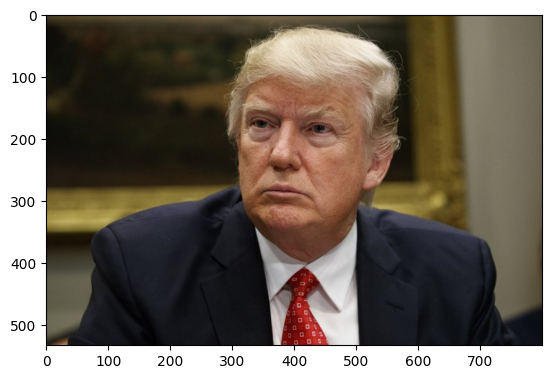

In [155]:
import matplotlib.pyplot as plt
img = plt.imread('img.jpg')
plt.imshow(img)
plt.show()

In [196]:
img.shape

(533, 800, 3)

In [216]:
# ваш код здесь
grayscale_img = img[:, :, 1]*0.299 + img[:, :, 1]*0.587 + img[:, :, 1]*0.114
assert grayscale_img.shape == (533, 800)

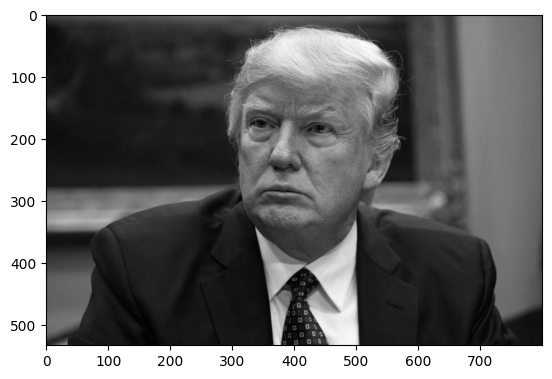

In [217]:
plt.imshow(grayscale_img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

### Задание 10

Вам требуется сделать ресайз изображения в два раза с помощью NumPy.

Хинт: А что если брать каждый второй пиксель?

In [235]:
# ваш код здесь
resised_image = img[::2, ::2]
assert resised_image.shape == (267, 400, 3)

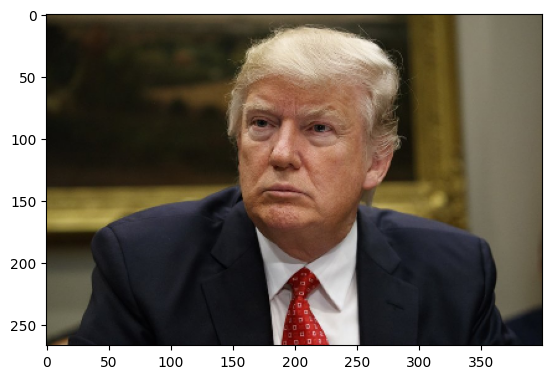

In [236]:
plt.imshow(resised_image)
plt.show()

## Внеплановый эксперимент

In [162]:
img[:, :, 1]

array([[66, 64, 64, ..., 98, 97, 97],
       [65, 64, 64, ..., 98, 97, 97],
       [63, 63, 62, ..., 98, 97, 97],
       ...,
       [31, 32, 31, ..., 15, 16, 17],
       [29, 31, 32, ..., 15, 16, 17],
       [25, 29, 34, ..., 15, 16, 17]], dtype=uint8)

In [161]:
img[:, :, 2]

array([[43, 41, 38, ..., 79, 78, 78],
       [42, 41, 38, ..., 79, 78, 78],
       [40, 40, 39, ..., 79, 78, 78],
       ...,
       [28, 27, 26, ..., 22, 23, 24],
       [23, 25, 26, ..., 22, 23, 24],
       [18, 20, 25, ..., 22, 23, 24]], dtype=uint8)

In [166]:
test = np.array(np.zeros_like(img))

In [167]:
test.shape

(533, 800, 3)

In [169]:
test[:,:, 0] = img[:, :, 1]*0.299
test[:,:, 1] = img[:, :, 1]*0.587
test[:,:, 2] = img[:, :, 1]*0.114

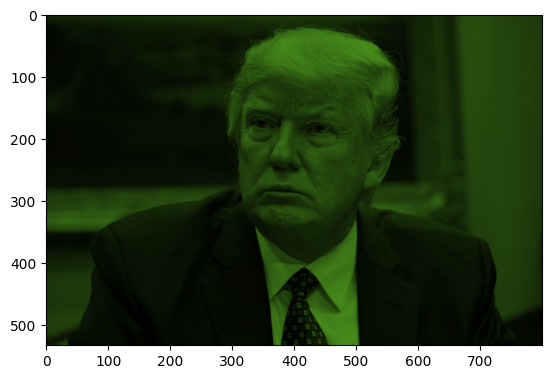

In [170]:
plt.imshow(test)